In [1]:
#Importing libraries...
import pandas as pd
import matplotlib.pyplot as plt

@This notebook will encompasses the following 
- Numerical variable & histograms,
- Categorical variable & count plots,
- Relationships between numerical variables & scatter plots, joint plots, and pair plots, and
- Relationships between numerical and categorical variables & box-and-whisker plots and complex conditional plots.

# Data Preparation

In [3]:
#Loading dataset
data_source='C:/Users/mdram/repo/EDA/Housing.csv'
ds=pd.read_csv(data_source)
print(ds.head(10))

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

In [4]:
ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


- The **housing** dataset contains 545 rows and 13 columns based on various types of attributes.
- Column values are: price, area, bedrooms,bathrooms,stories,mainroad,guestroom.basement,hotwaterheating, airconditioning	parking	prefarea, furnishingstatus.

In [5]:
ds.shape, ds.info() #Getting information about the data and dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


((545, 13), None)

In [6]:
ds.describe()
#Descriptive statistics include those that summarize the central tendency, dispersion and shape
#--of a dataset's distribution,excluding NaN values. Analyzes both ...

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
cols = ds.columns  # whole column at a glance
cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
ds.select_dtypes(include=['object']).columns.tolist()    ##for categorical

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [9]:
numcol= ds._get_numeric_data().columns  #for numerical
numcol

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [10]:
 ds.select_dtypes(include=['object']) #for columns with non-int value

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [11]:
ds.select_dtypes(include=['int'])  #for columns with int value

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [12]:
#Separating numerical and categorical 
cate=['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']
num=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [13]:
ds= ds[cate + num]
ds.shape

(545, 13)

# Analyzing Numerical Variables

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


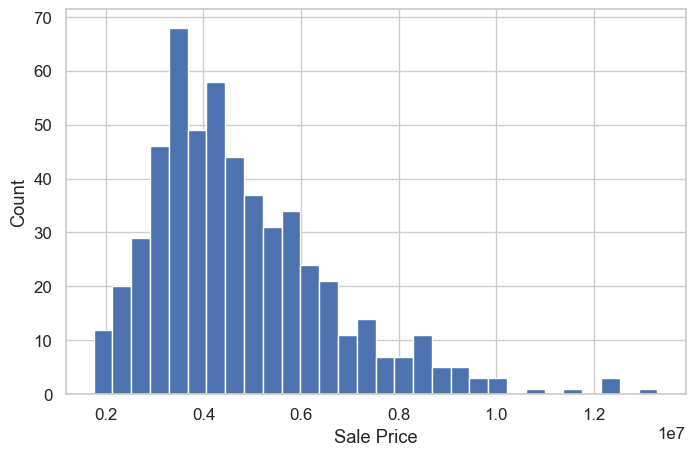

In [39]:
import seaborn as sb
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sb.distplot(ds['price'], norm_hist=False, kde=False, bins=30, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

-  Having a look at the graph, it can be said that most of the housing price fall between .3e7 and .6e7. The number with higher rates house is quite low

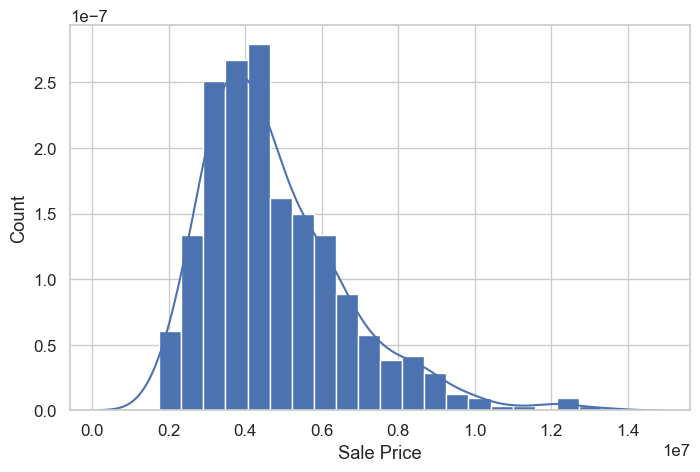

In [15]:
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sb.distplot(ds['price'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

-  Normalized weights are showed here

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

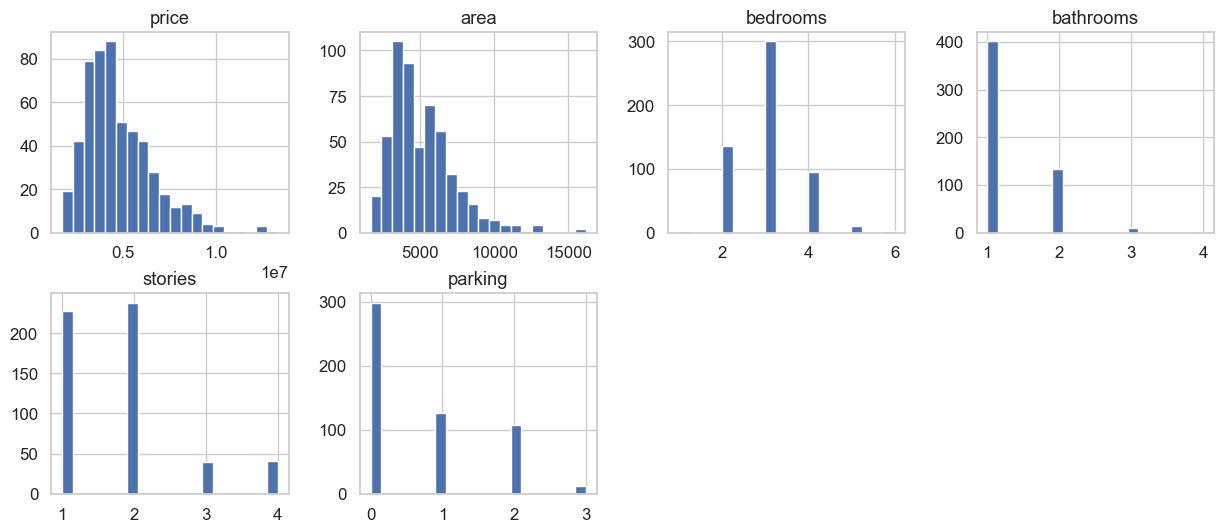

In [16]:
ds[num].hist(bins=20, figsize=(15, 6),layout=(2, 4))

# Analyzing Categorical Variables

- Categorical variables are those for which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

In [17]:
ds.select_dtypes(include=['object']). columns.tolist()

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

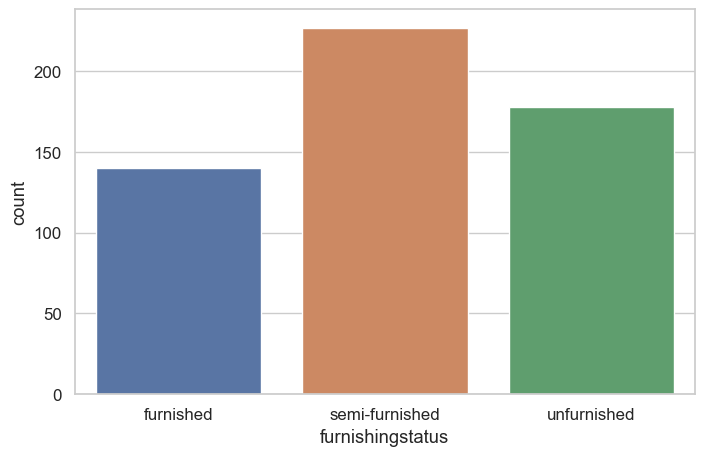

In [33]:
sb.countplot(ds['furnishingstatus']) #Observations in each category: the countplot.

The number of housing with guestroom is on more demand

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mdram\anaconda3\lib\si

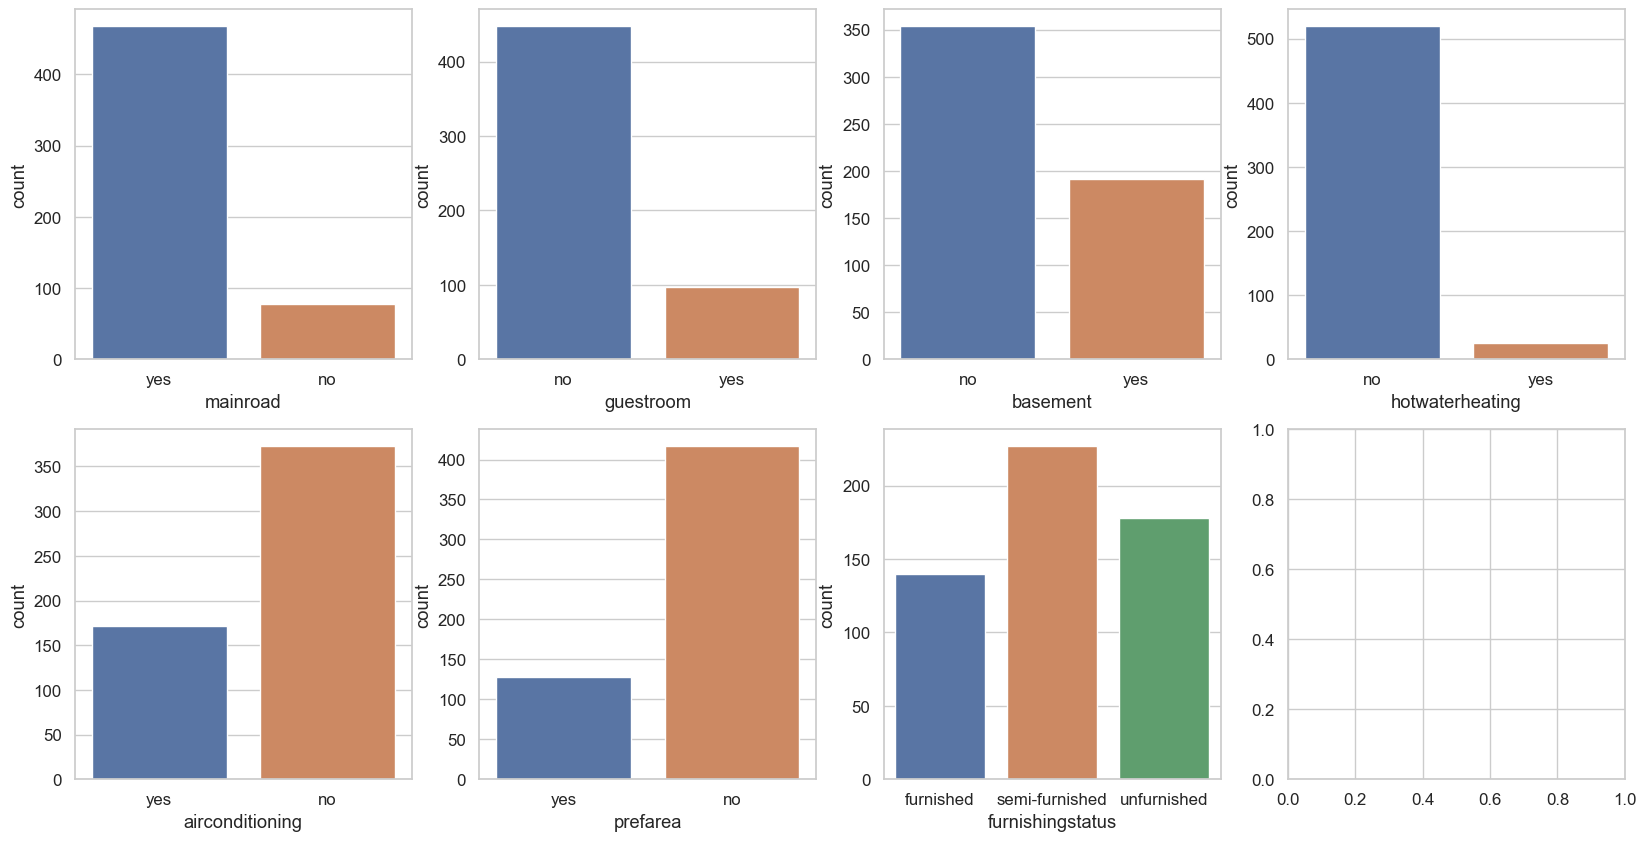

In [19]:
fig, ax = plt.subplots(2,4, figsize=(20, 10)) #Subplot Creation,
for variable, subplot in zip(cate, ax.flatten()): #ax.flatten() converts the 2x4 array of axes into a flat array for easy iteration.
    sb.countplot(ds[variable], ax=subplot)
#for label in subplot.get_xticklabels():
    #label.set_rotation(90)

# Relationships Between Numerical Variables

#Houses with air-conditioning, area, semi-furnishing sold more provided that they are close to mainroad, has guestroom and basement

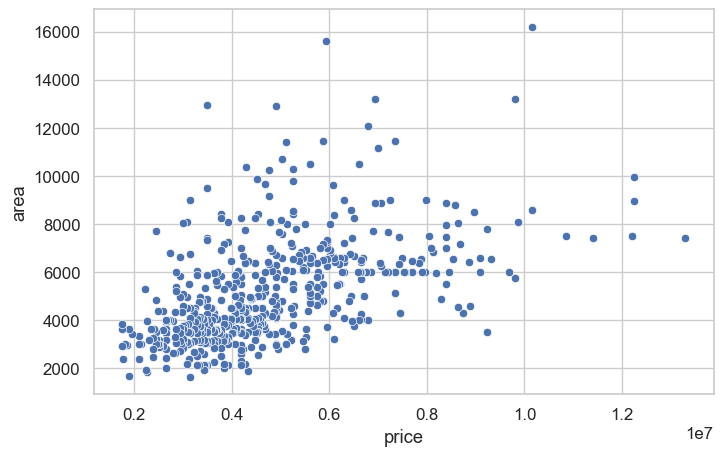

In [38]:
#ds.select_dtypes(include=('int'))
sb.scatterplot(x=ds['price'], y=ds['area']);

- The more the area, the more the price. 

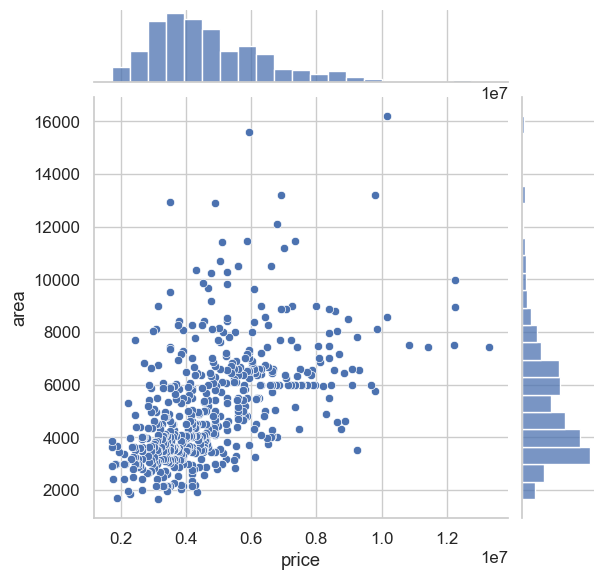

In [21]:
sb.jointplot(x=ds['price'], y=ds['area']); 
#joint plot/marginal plot:We see the relationships between the two variables, but also how they are distributed individually.

# Relationships Between Numerical and Categorical Variables

In [22]:
ds.select_dtypes(include='int'), ds.select_dtypes(include='object')

(        price  area  bedrooms  bathrooms  stories  parking
 0    13300000  7420         4          2        3        2
 1    12250000  8960         4          4        4        3
 2    12250000  9960         3          2        2        2
 3    12215000  7500         4          2        2        3
 4    11410000  7420         4          1        2        2
 ..        ...   ...       ...        ...      ...      ...
 540   1820000  3000         2          1        1        2
 541   1767150  2400         3          1        1        0
 542   1750000  3620         2          1        1        0
 543   1750000  2910         3          1        1        0
 544   1750000  3850         3          1        2        0
 
 [545 rows x 6 columns],
     mainroad guestroom basement hotwaterheating airconditioning prefarea  \
 0        yes        no       no              no             yes      yes   
 1        yes        no       no              no             yes       no   
 2        yes        n

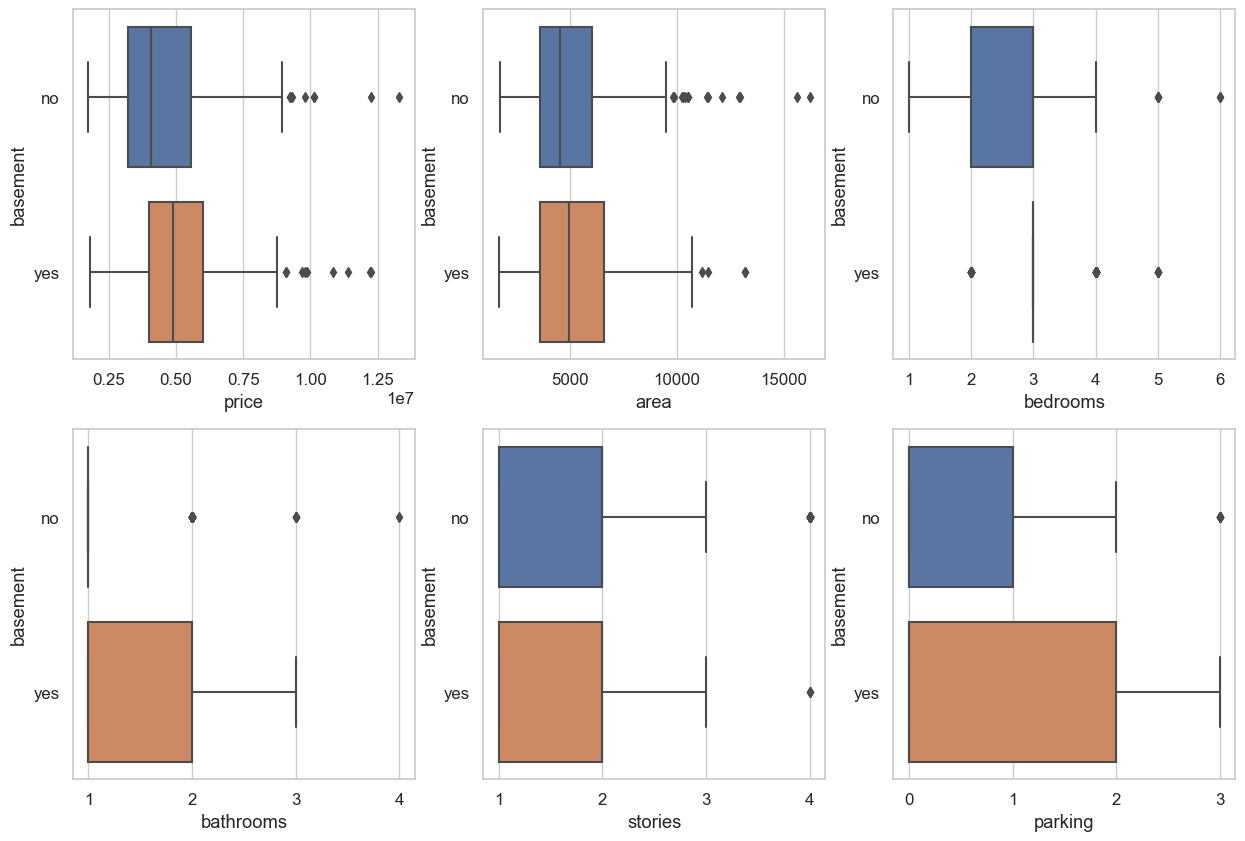

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for var, subplot in zip(num, ax.flatten()):
    sb.boxplot(x=var, y='basement', data=ds, ax=subplot)

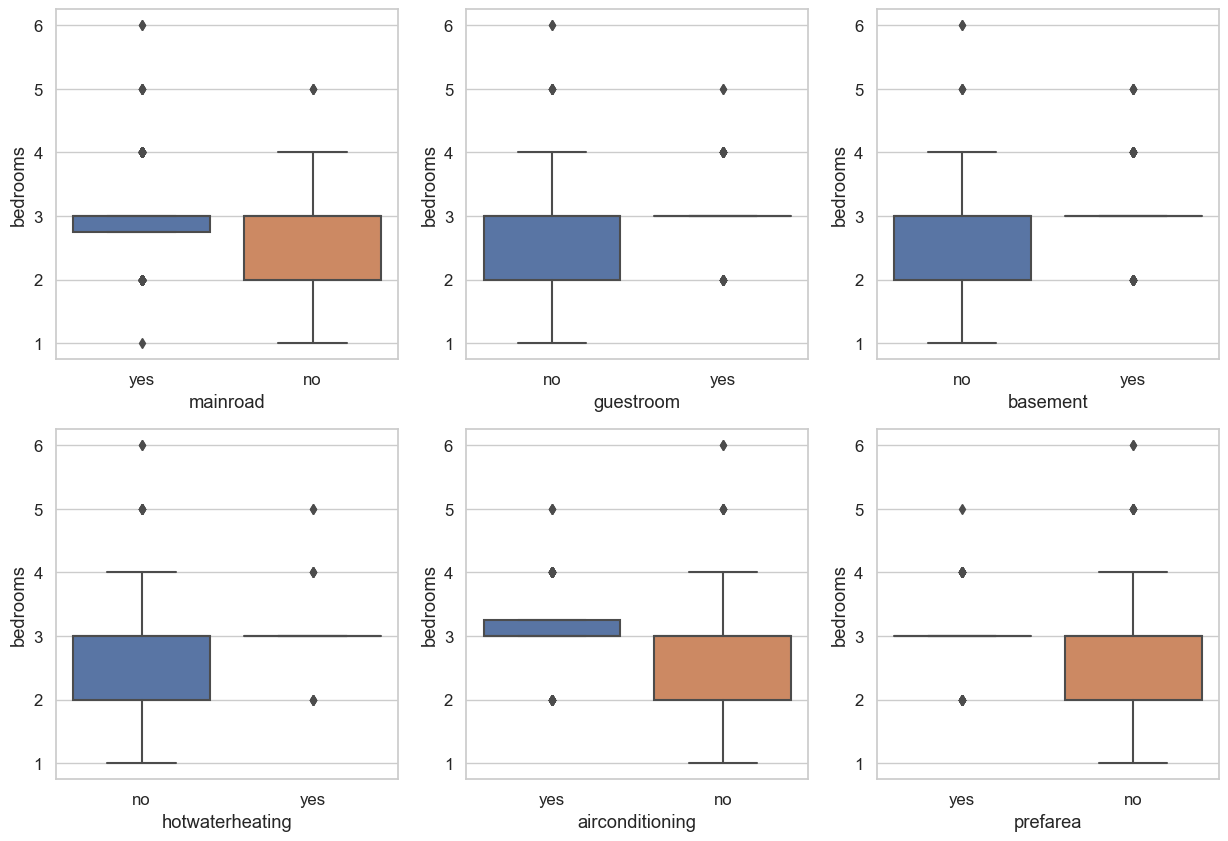

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for var, subplot in zip(cate, ax.flatten()):
    sb.boxplot(x=var, y='bedrooms', data=ds, ax=subplot)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

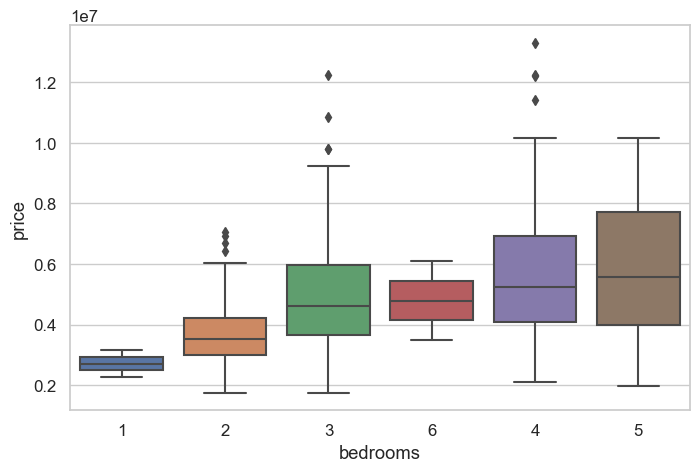

In [25]:
sorted_nb = ds.groupby(['bedrooms'])['price'].median().sort_values()
sb.boxplot(x=ds['bedrooms'], y=ds['price'], order=list(sorted_nb.index))

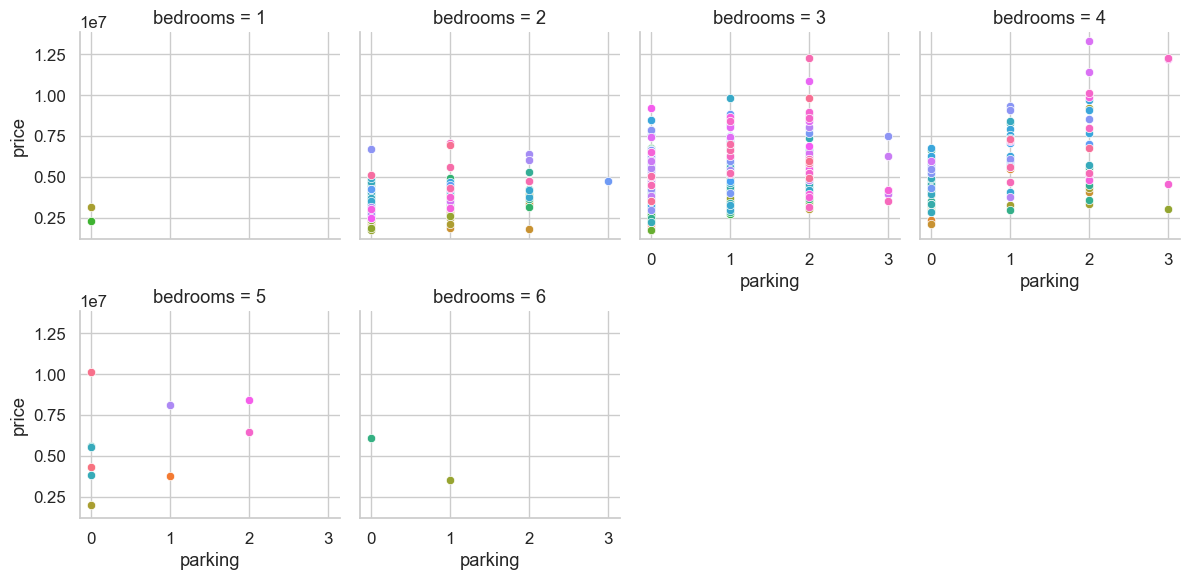

In [26]:
cond_plot = sb.FacetGrid(data=ds, col='bedrooms', hue='area', col_wrap=4)
cond_plot.map(sb.scatterplot, 'parking', 'price');